In [219]:

# Import packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
import scipy
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
from sklearn.metrics import log_loss
from scipy import stats

In [220]:
df=pd.read_csv('https://raw.githubusercontent.com/Lokeshrajkp/Placement-Assignment_Lokeshraj-K-P/main/Machine%20learning/online_shoppers_intention.csv',skipinitialspace = True,header=0,sep=' *, *', encoding='ascii' )

<ipython-input-220-41495924070e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('https://raw.githubusercontent.com/Lokeshrajkp/Placement-Assignment_Lokeshraj-K-P/main/Machine%20learning/online_shoppers_intention.csv',skipinitialspace = True,header=0,sep=' *, *', encoding='ascii' )


In [221]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [222]:
df.shape

(12330, 18)

In [223]:
print(list(df.columns))

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [224]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

Column Descriptions:
Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

In [225]:
df.shape

(12330, 18)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [227]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [228]:
df.duplicated().sum()

125

In [229]:
df.drop_duplicates(inplace=True)

In [230]:
df.duplicated().sum()

0

In [231]:
df.shape

(12205, 18)

In [232]:
nullcount = df.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


In [233]:
uniques = df.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


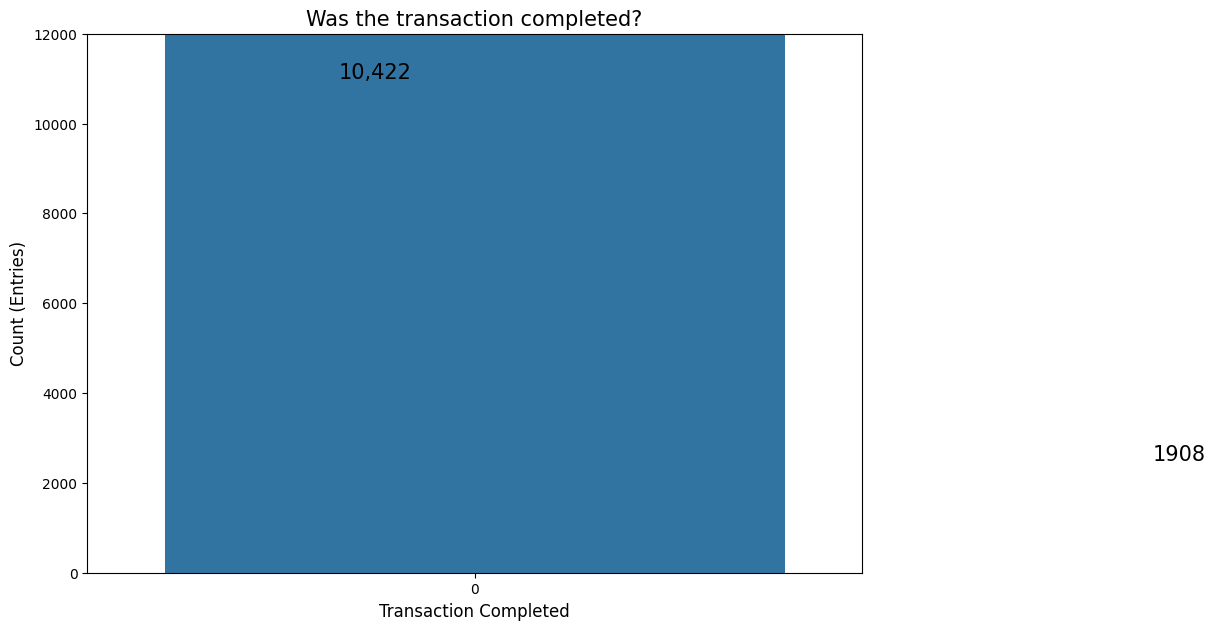

In [234]:
# Visualize the data
sns.countplot(df['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()

In [235]:
df['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

<Axes: xlabel='Revenue', ylabel='count'>

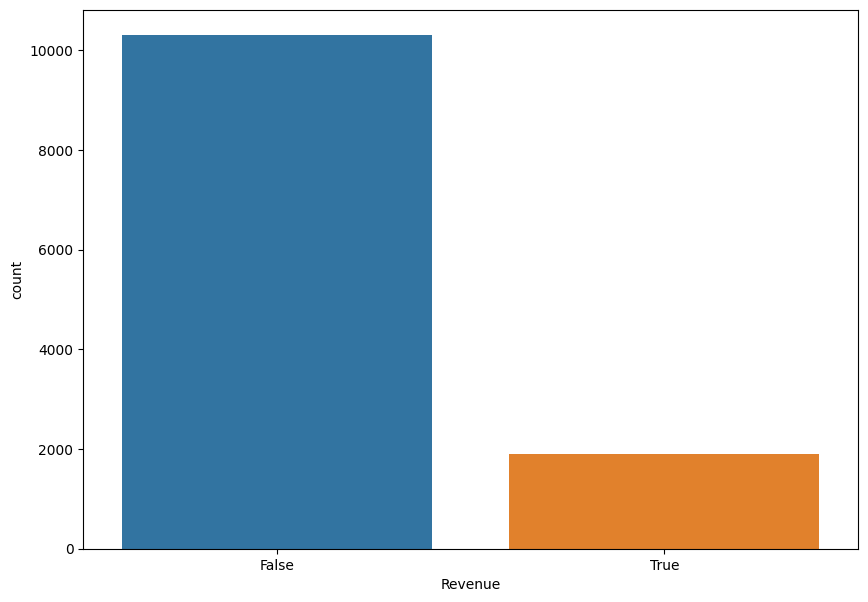

In [236]:
sns.countplot(x=df['Revenue'])

In [237]:
df['Weekend'].value_counts()

False    9346
True     2859
Name: Weekend, dtype: int64

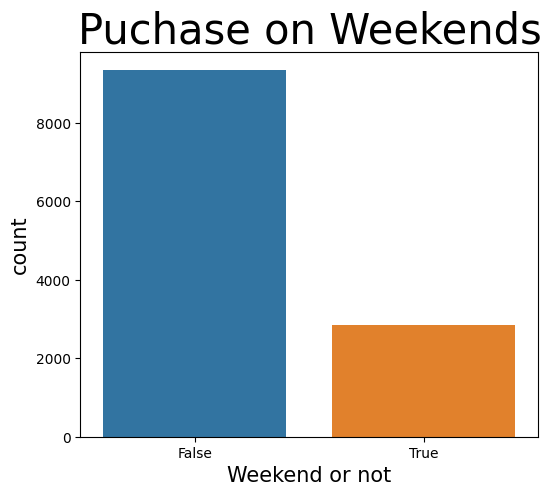

In [238]:
# checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (13,5)
plt.subplot(1, 2, 2)
sns.countplot(x=df['Weekend'])
plt.title('Puchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [239]:
# checking the no. of Os's is having
df['OperatingSystems'].value_counts()

2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

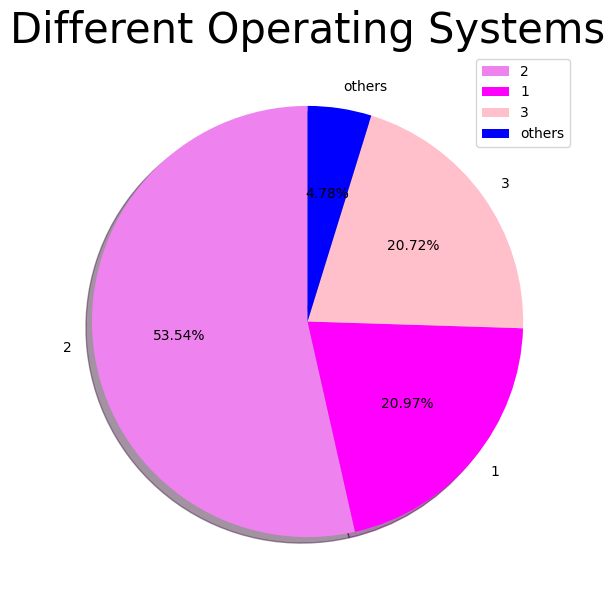

In [240]:
# plotting a pie chart for Operating Systems

plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['violet', 'magenta', 'pink', 'blue']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Different Operating Systems', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

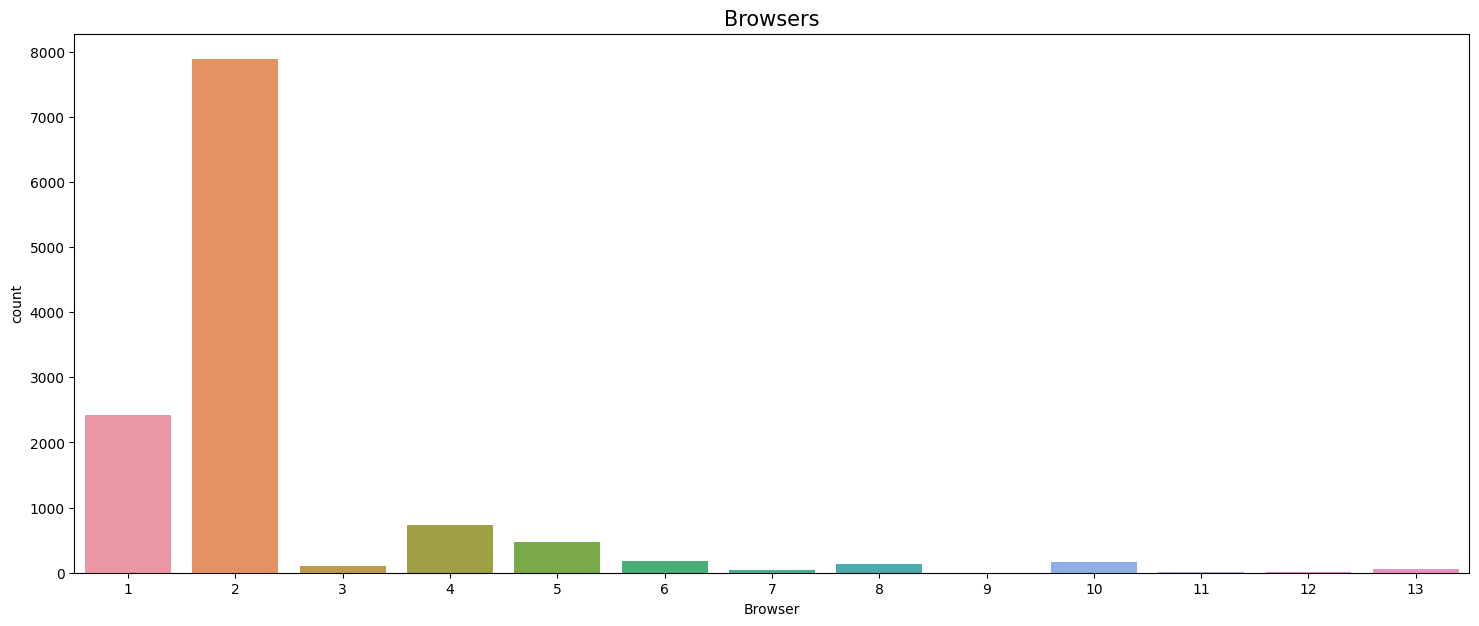

In [241]:
sns.countplot(x=df['Browser'])
plt.title('Browsers', fontsize=15)
plt.show()

In [242]:
df['Month'].value_counts()

May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64

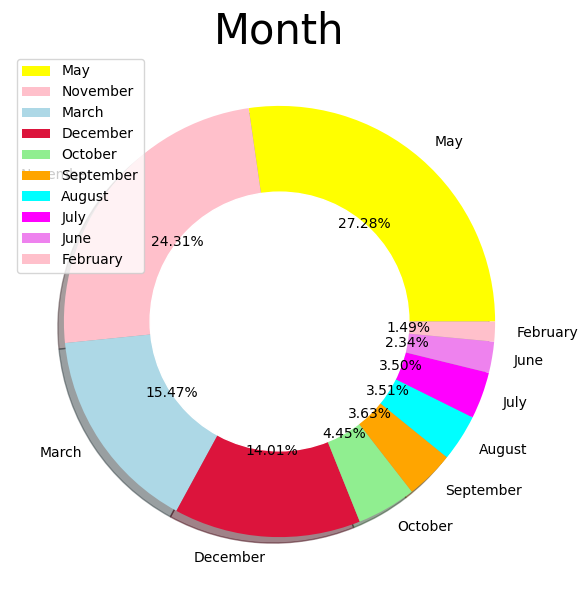

In [243]:
# plotting a pie chart for share of special days
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [244]:
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

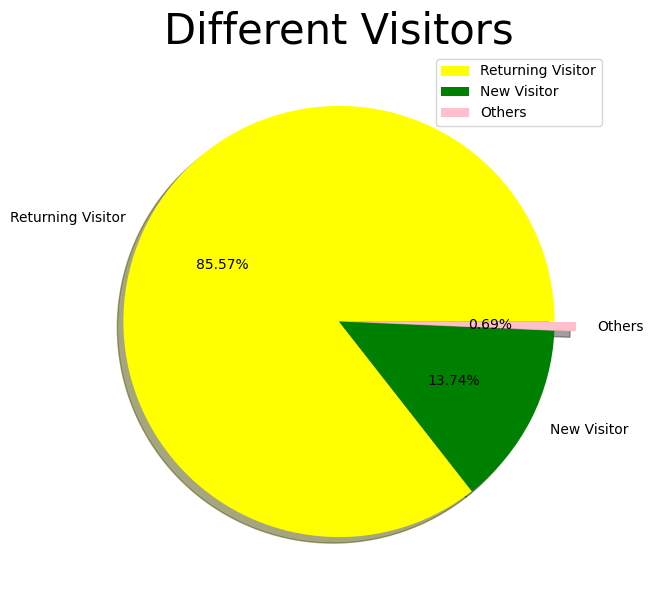

In [245]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['yellow', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [246]:
df['TrafficType'].value_counts()

2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

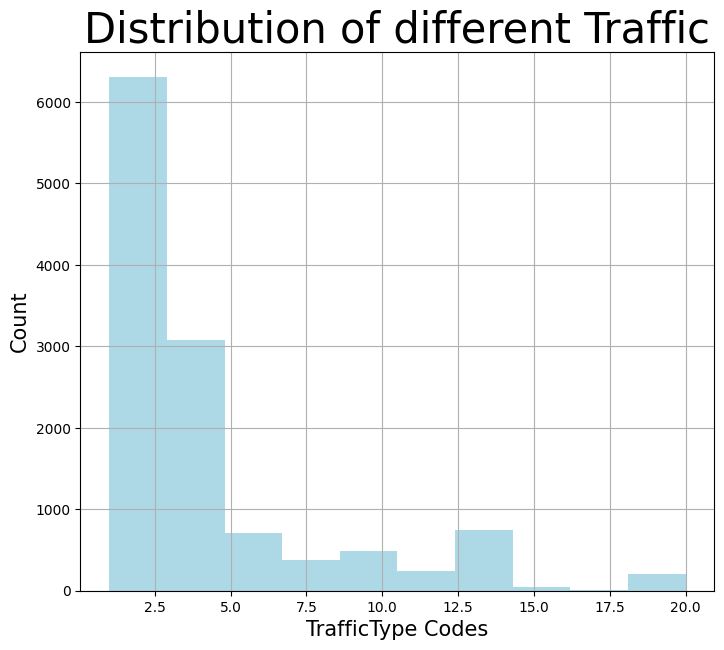

In [247]:
# visualizing the distribution of different traffic around the TrafficType
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['TrafficType'], color = 'lightblue')
plt.title('Distribution of different Traffic', fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.grid()
plt.show()

In [248]:
df['Region'].value_counts()

1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64

In [249]:
df['SpecialDay'].value_counts()

0.0    10956
0.6      350
0.8      324
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

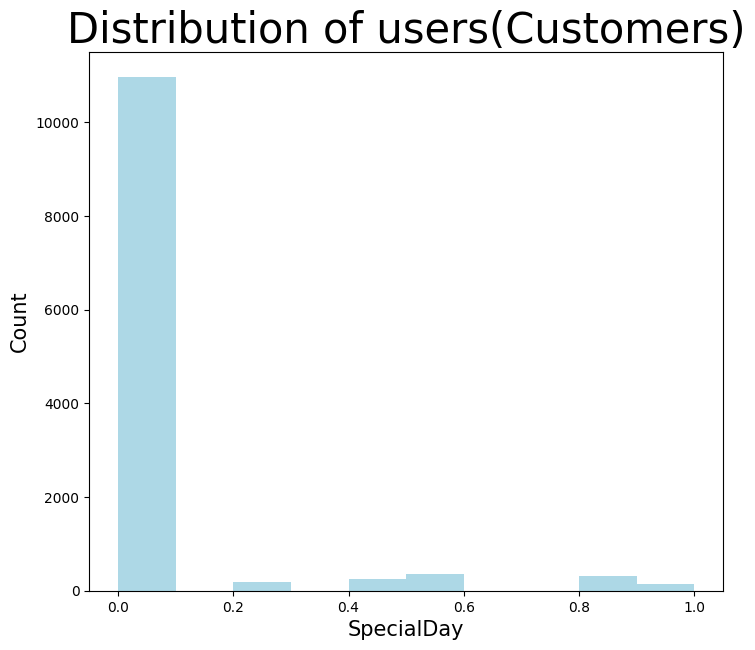

In [250]:
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
plt.hist(df['SpecialDay'], color = 'lightblue')
plt.title('Distribution of users(Customers)', fontsize = 30)
plt.xlabel('SpecialDay', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

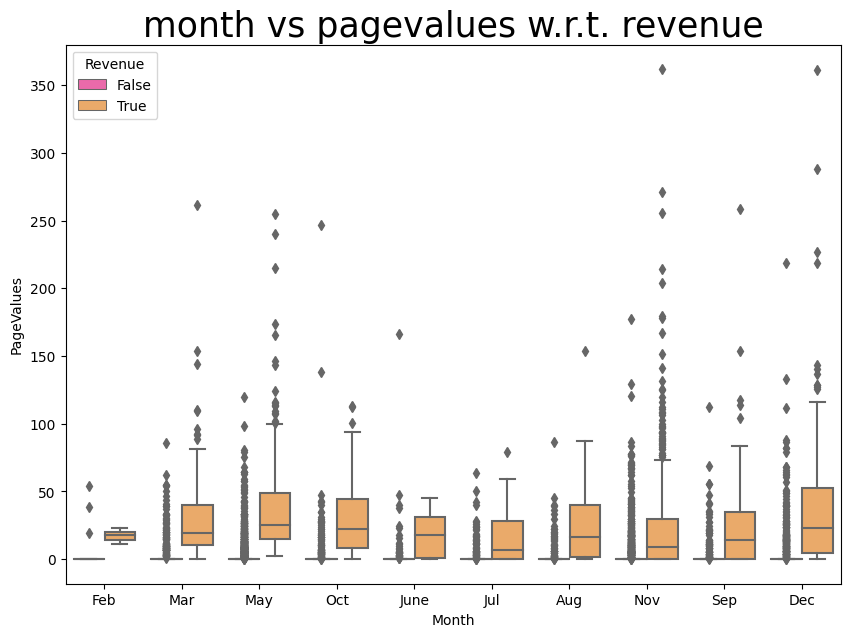

In [251]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'spring')
plt.title('month vs pagevalues w.r.t. revenue', fontsize = 25)
plt.show()

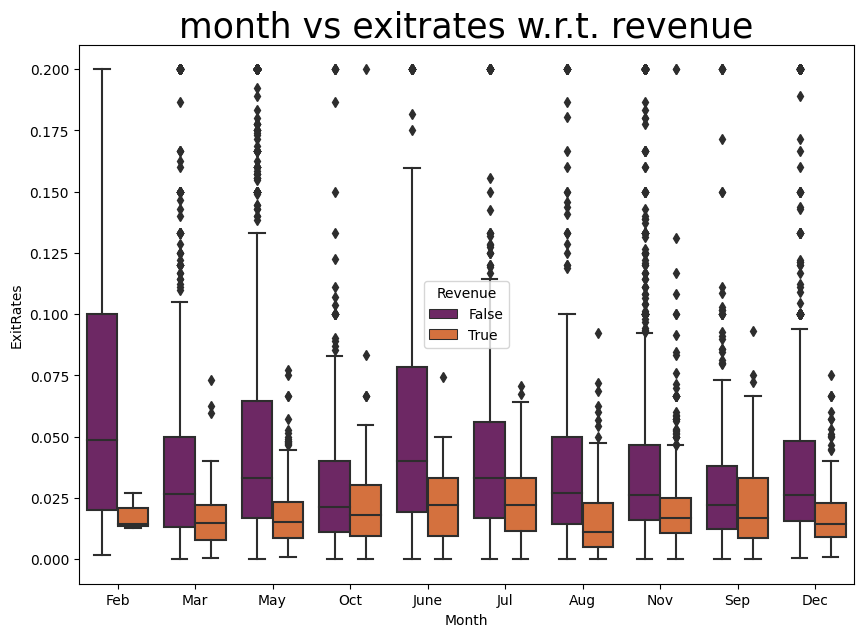

In [252]:
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'inferno')
plt.title('month vs exitrates w.r.t. revenue', fontsize = 25)
plt.show()


In [253]:
multivariate_feature_analysis = [
    ['month vs pagevalues', 'Revenue', 'Gaussian', 'High', 'Low', 'Low', 'High'],
    ['month vs exitrates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'Medium'],
    ['month vs bounceRates' , 'Revenue', 'Gaussian', 'Low', 'High', 'Medium', 'High'],
    ['visitor type vs BounceRates' , 'Revenue', 'Exponential', 'Low', 'High', 'Low', 'High'],
    ['visitor type vs exit rates' , 'Revenue', 'Exponential', 'Low', 'High', 'High', 'Medium'],
    ['visitor type vs exit rates', 'Revenue', 'Exponential', 'High', 'Low', 'High', 'Medium'],
    ['region vs pagevalues', 'Revenue', 'Exponential', 'Low', 'High', 'High', 'High'],
    ['rigion vs exit rates', 'Revenue', 'Gaussian', 'High', 'High', 'High', 'Medium'] 
]
feature_summary = pd.DataFrame(multivariate_feature_analysis, columns=['Multivariate_features', 'W.R.T', 'Distribution', 'Revenue_True', 'Revenue_False', 'Outliers', 'Importance'])
feature_summary

,Multivariate_features,W.R.T,Distribution,Revenue_True,Revenue_False,Outliers,Importance
0,month vs pagevalues,Revenue,Gaussian,High,Low,Low,High
1,month vs exitrates,Revenue,Gaussian,Low,High,Medium,Medium
2,month vs bounceRates,Revenue,Gaussian,Low,High,Medium,High
3,visitor type vs BounceRates,Revenue,Exponential,Low,High,Low,High
4,visitor type vs exit rates,Revenue,Exponential,Low,High,High,Medium
5,visitor type vs exit rates,Revenue,Exponential,High,Low,High,Medium
6,region vs pagevalues,Revenue,Exponential,Low,High,High,High
7,rigion vs exit rates,Revenue,Gaussian,High,High,High,Medium


In [254]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [255]:
cat_cols=['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']

In [256]:
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']

In [257]:
df_clean = df.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'],axis=1)

In [258]:
df['Month']

0        Feb
1        Feb
2        Feb
3        Feb
4        Feb
        ... 
12325    Dec
12326    Nov
12327    Nov
12328    Nov
12329    Nov
Name: Month, Length: 12205, dtype: object

In [259]:
df_clean=df.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [260]:
visitor_encoded = pd.get_dummies(df_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)
df_clean_merged = pd.concat([df_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [261]:
df_clean_merged 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,Visitor_Type_Other,Visitor_Type_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,False,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,False,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,False,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,False,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,False,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,False,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,False,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,False,0,1


In [262]:
X = df_clean_merged.drop('Revenue', axis=1)
y = df_clean_merged['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

In [263]:
X.shape

(12205, 12)

In [264]:
y.shape

(12205,)

In [265]:
# Fit Random Forest Classifier
rfc = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=500)
rfc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('confusion_matrix',confusion_matrix(y_test, y_pred_rfc))
print('Random Forest Classifier model accuracy(in %):', round(accuracy_score(y_test, y_pred_rfc)*100,2))

confusion_matrix [[2017   42]
 [ 210  172]]
Random Forest Classifier model accuracy(in %): 89.68


Label and One Hot Encoding
In order to properly fit our classifier, we will need to encode our string variables to integer labels, then convert our labels from integers to One Hot columns to remove any implied hierarchy.

The area under the ROC curve is: 0.91


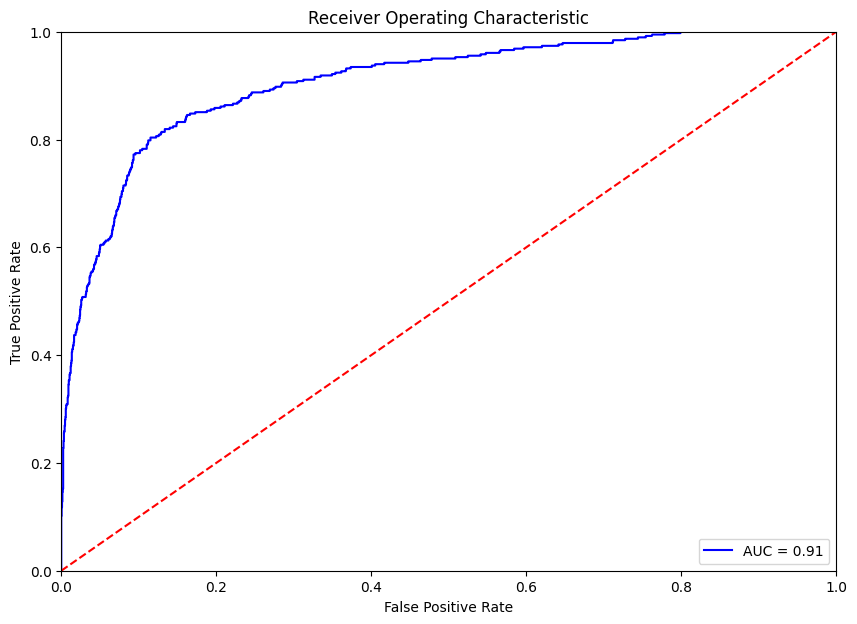

In [266]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()